# Clustering

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data/tel_usage.csv')
df.head()

,SMS,Phone
0,4,84
1,4,87
2,0,28
3,9,185
4,3,28


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SMS     500 non-null    int64
 1   Phone   500 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SMS,500.0,17.814,22.870801,0.0,4.0,8.0,18.0,100.0
Phone,500.0,51.622,55.845255,0.0,9.0,29.0,73.0,200.0


- ปรับสเกลฟีเจอร์ให้เท่าเทียมกัน
- เรียกใช้ `StandardScaler`

In [12]:
from sklearn.preprocessing import StandardScaler

- ปรับสเกลฟีเจอร์

In [13]:
dfs = StandardScaler().fit_transform(df)
dfs

array([[-0.60460648,  0.58036133],
       [-0.60460648,  0.63413501],
       [-0.77967713, -0.42341391],
       [-0.38576817,  2.39074168],
       [-0.64837415, -0.42341391],
       [-0.34200051,  0.61621045],
       [-0.56083882,  0.68790868],
       [-0.60460648,  0.90300337],
       [-0.34200051, -0.08284731],
       [-0.64837415,  1.45866467],
       [-0.51707116, -0.06492275],
       [-0.69214181, -0.36964023],
       [-0.4733035 ,  1.96055229],
       [-0.69214181,  0.92092793],
       [-0.56083882,  1.27941909],
       [-0.60460648, -0.83567874],
       [-0.42953584,  0.3831912 ],
       [-0.64837415,  1.85300494],
       [-0.38576817, -0.04699819],
       [-0.38576817,  1.1897963 ],
       [-0.64837415, -0.65643316],
       [-0.42953584,  0.70583324],
       [-0.69214181,  0.20394562],
       [-0.60460648,  1.78130671],
       [-0.4733035 ,  1.90677861],
       [-0.64837415,  1.60206113],
       [-0.64837415,  0.18602106],
       [-0.42953584,  2.65961004],
       [-0.42953584,

- สร้าง DataFrame ขึ้นมาใหม่

In [14]:
dfn = pd.DataFrame(dfs, columns=df.columns, index=df.index)
dfn

,SMS,Phone
0,-0.604606,0.580361
1,-0.604606,0.634135
2,-0.779677,-0.423414
3,-0.385768,2.390742
4,-0.648374,-0.423414
...,...,...
495,3.115645,-0.853603
496,1.452474,-0.817754
497,2.853039,-0.889452
498,0.270747,-0.889452


In [15]:
dfn.describe()

,SMS,Phone
count,5.000000e+02,5.000000e+02
mean,2.842171e-17,-2.842171e-17
std,1.001002e+00,1.001002e+00
min,-7.796771e-01,-9.253015e-01
25%,-6.046065e-01,-7.639805e-01
50%,-4.295358e-01,-4.054893e-01
75%,8.140785e-03,3.831912e-01
max,3.597089e+00,2.659610e+00


In [16]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
SMS,500.0,2.842171e-17,1.001002,-0.779677,-0.604606,-0.429536,0.008141,3.597089
Phone,500.0,-2.842171e-17,1.001002,-0.925302,-0.763981,-0.405489,0.383191,2.659610


In [17]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMS     500 non-null    float64
 1   Phone   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# หาจำนวนกลุ่ม (k) ที่เหมาะสมที่สุด

In [19]:
from sklearn.cluster import KMeans

In [20]:
k_values = range(1, 11)
scores = []
for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state=233)
  kmeans.fit(dfn)
  scores.append(kmeans.inertia_)

In [21]:
scores

[1000.0,
 525.7746942521118,
 165.8381618220607,
 123.11024793246037,
 84.63374678962674,
 70.79152122338132,
 49.023305611033386,
 41.763569869277916,
 32.87679535026264,
 27.120036238430274]

- สร้างกราฟแสดงความสัมพันธ์ของ WCSS กับ จำนวนกลุ่ม

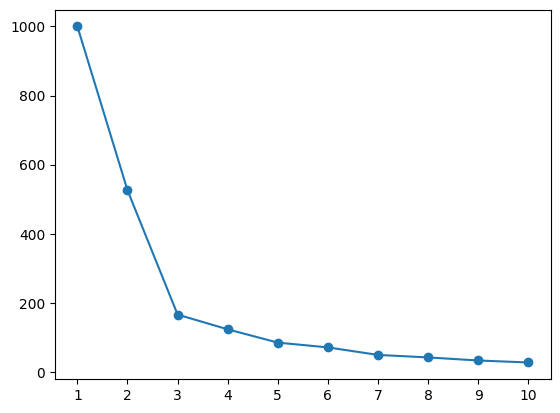

In [22]:
import matplotlib.pyplot as plt

plt.plot(k_values, scores, 'o-')
plt.xticks(k_values)
plt.show()

- ใช้ `kneed` library ในการหาจุดหักศอก
- ต้องติดตั้งเพิ่ม
> `%pip install kneed`

In [23]:
%pip install kneed

- เรียกใช้ `KneeLocator`

In [24]:
from kneed import KneeLocator

- หาจุดหักศอก

In [25]:
kneedle = KneeLocator(k_values, scores, curve='convex', direction='decreasing')

In [26]:
kneedle.elbow

3

- ดูผลลัพธ์จากกราฟ

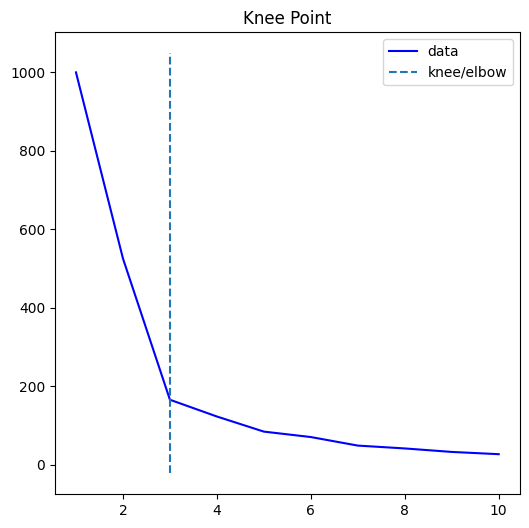

In [27]:
kneedle.plot_knee()

- แบ่ง cluster ออกเป็น 3 กลุ่ม

In [28]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=555, verbose=1)
kmeans.fit(dfn)

Initialization complete
Iteration 0, inertia 251.03897099065037.
Iteration 1, inertia 168.73383859223057.
Iteration 2, inertia 166.44256201732395.
Iteration 3, inertia 166.06843327945765.
Iteration 4, inertia 165.86618039363015.
Iteration 5, inertia 165.8381618220607.
Converged at iteration 5: strict convergence.


KMeans(n_clusters=3, n_init='auto', random_state=555, verbose=1)

In [29]:
kmeans.labels_

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

- แสดงกลุ่มด้วยกราฟ

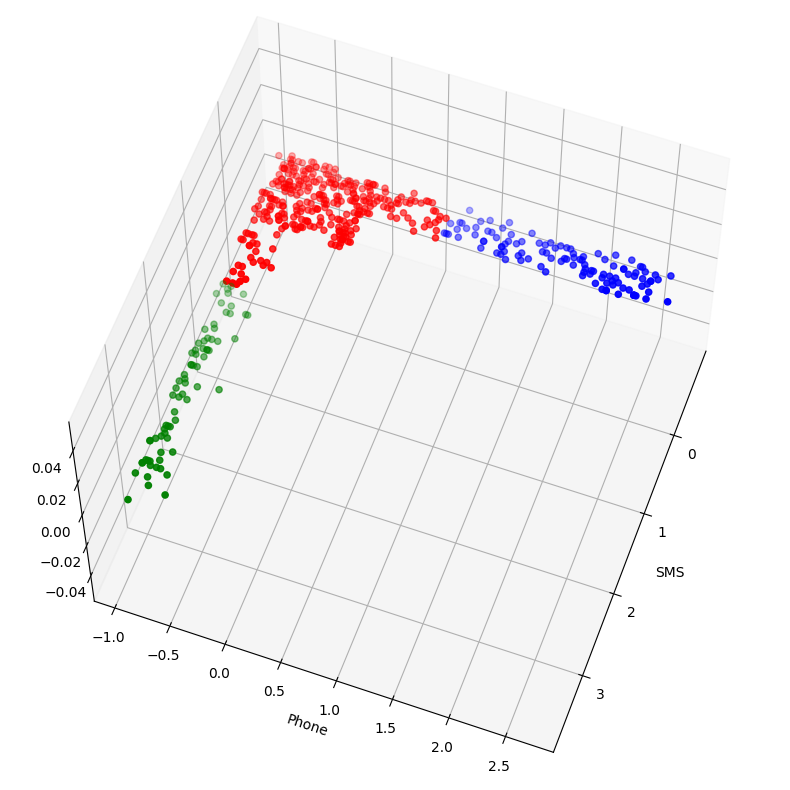

In [30]:
labels = kmeans.labels_
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfn.SMS[labels==0], dfn.Phone[labels==0], c='r')
ax.scatter(dfn.SMS[labels==1], dfn.Phone[labels==1], c='g')
ax.scatter(dfn.SMS[labels==2], dfn.Phone[labels==2], c='b')
ax.set_xlabel(dfn.SMS.name)
ax.set_ylabel(dfn.Phone.name)
ax.view_init(60, 20)
plt.show()

In [31]:
kmeans.cluster_centers_

array([[-0.3169511 , -0.39787987],
       [ 2.19352611, -0.82143731],
       [-0.54437576,  1.71092404]])

In [32]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
SMS,500.0,2.842171e-17,1.001002,-0.779677,-0.604606,-0.429536,0.008141,3.597089
Phone,500.0,-2.842171e-17,1.001002,-0.925302,-0.763981,-0.405489,0.383191,2.659610


In [33]:
df

,SMS,Phone
0,4,84
1,4,87
2,0,28
3,9,185
4,3,28
...,...,...
495,89,4
496,51,6
497,83,2
498,24,2


In [34]:
df['label'] = kmeans.labels_
df

,SMS,Phone,label
0,4,84,0
1,4,87,0
2,0,28,0
3,9,185,2
4,3,28,0
...,...,...,...
495,89,4,1
496,51,6,1
497,83,2,1
498,24,2,0


In [35]:
df[df.label==1]

,SMS,Phone,label
64,58,2,1
66,65,2,1
67,84,0,1
68,90,10,1
69,77,7,1
...,...,...,...
494,59,7,1
495,89,4,1
496,51,6,1
497,83,2,1


In [36]:
dtt = df.copy()
dtt['label'] = kmeans.labels_
dtt.groupby(['label']).mean()

,SMS,Phone
label,,
0,10.572327,29.424528
1,67.931507,5.794521
2,5.376147,147.073394
